In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

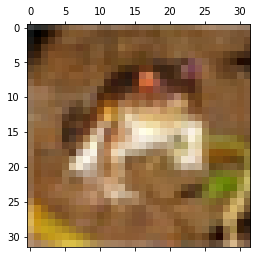

In [6]:
plt.matshow(x_train[0])

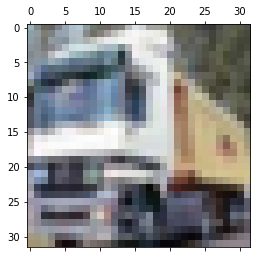

In [7]:
plt.matshow(x_train[1])

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

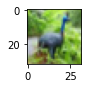

In [9]:
plot_sample(6)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1)

In [14]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
def plot_sample(x, y, index):
    plt.figure(figsize = (10,1))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

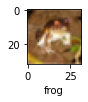

In [16]:
plot_sample(x_train, y_train, 0)

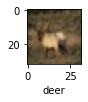

In [17]:
plot_sample(x_train, y_train, 3)

In [18]:
x_train = x_train /255
x_test = x_test /255

In [19]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [20]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [21]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes =10, dtype='float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype='float32'
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
cnn = keras.Sequential([
        #cnn
        layers.Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', input_shape =(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Conv2D(filters =32, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),
    
        #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])


In [24]:
cnn.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(x_train, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 65s 35ms/step - loss: 1.9777 - accuracy: 0.2823
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6057 - accuracy: 0.4234
Epoch 3/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4396 - accuracy: 0.4852
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.3386 - accuracy: 0.5257
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2575 - accuracy: 0.5579
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1921 - accuracy: 0.5825
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1364 - accuracy: 0.6022
Epoch 8/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0890 - accuracy: 0.6189
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0459 - accuracy: 0.6341
Epoch 10/10
1563/1563 [==============================] - 56s 36m

In [27]:
cnn.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 7s 19ms/step - loss: 1.0432 - accuracy: 0.6378


[1.0432020425796509, 0.6377999782562256]

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [32]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

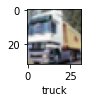

In [33]:
plot_sample(x_train, y_train, 1)

In [34]:
y_pred = cnn.predict(x_test)

In [35]:
y_pred

array([[0.590293  , 0.03813154, 0.85350686, ..., 0.0718933 , 0.682016  ,
        0.03431457],
       [0.9956956 , 0.9990257 , 0.19923821, ..., 0.03248054, 0.99960256,
        0.9949659 ],
       [0.897978  , 0.981001  , 0.23630416, ..., 0.12300277, 0.98789877,
        0.9636564 ],
       ...,
       [0.08760267, 0.01560342, 0.9791088 , ..., 0.9137856 , 0.03613544,
        0.07015952],
       [0.95748985, 0.8621242 , 0.32555366, ..., 0.16809672, 0.5142336 ,
        0.350053  ],
       [0.13661325, 0.11756599, 0.5743892 , ..., 0.99545884, 0.00770506,
        0.20863381]], dtype=float32)

In [36]:
np.argmax([41,56,73,900])

3

In [37]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [38]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

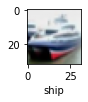

In [41]:
plot_sample(x_test, y_test, 1)

In [42]:
classes[y_classes[1]]

'ship'

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1000
           1       0.81      0.69      0.75      1000
           2       0.57      0.43      0.49      1000
           3       0.46      0.50      0.48      1000
           4       0.59      0.56      0.58      1000
           5       0.55      0.52      0.54      1000
           6       0.60      0.83      0.69      1000
           7       0.74      0.64      0.69      1000
           8       0.76      0.73      0.75      1000
           9       0.70      0.73      0.71      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000

